CNN nowcasting trainig curve


Training configuration:
  learning_rate: 0.0001
  batch_size: 32
  num_epochs: 5
  weight_decay: 0.0001
  scheduler_patience: 10
  early_stopping_patience: 15
  save_dir: models
  log_dir: logs
  image_dirs: ['data/processed/2019_01_18']
  irradiance_files: ['GIRASOL_DATASET/2019_01_18/pyranometer/2019_01_18.csv']

Number of epochs: 5
Final Train MSE: 115.4604, RMSE: 10.7453
Final Validation MSE: 179.6875, RMSE: 13.4048
Minimum Validation MSE: 115.4217, RMSE: 10.7434
Minimum Training MSE: 115.4604, RMSE: 10.7453


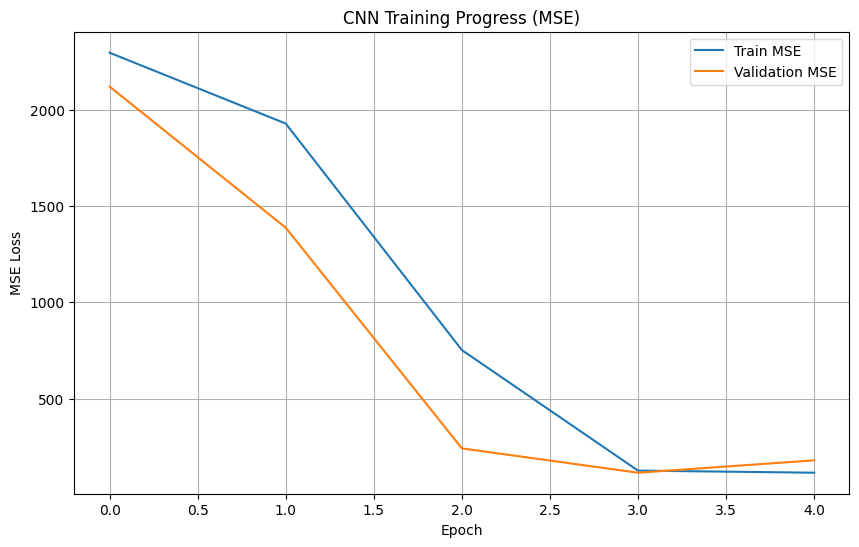

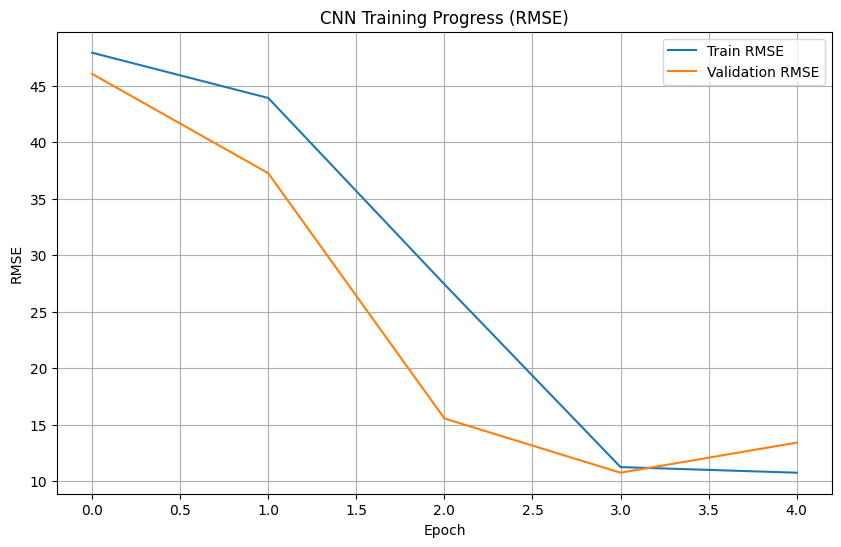

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open(r'D:\Project Phase 1\Hybrid CNN-LSTM for Solar Irradiance Forecasting\logs\cnn_training_history.json', 'r') as f:
    history = json.load(f)

train_losses = history['train_losses']  
val_losses = history['val_losses']
config = history['config']

train_rmse = np.sqrt(train_losses)
val_rmse = np.sqrt(val_losses)

print("Training configuration:")
for k, v in config.items():
    print(f"  {k}: {v}")

print(f"\nNumber of epochs: {len(train_losses)}")
print(f"Final Train MSE: {train_losses[-1]:.4f}, RMSE: {train_rmse[-1]:.4f}")
print(f"Final Validation MSE: {val_losses[-1]:.4f}, RMSE: {val_rmse[-1]:.4f}")
print(f"Minimum Validation MSE: {min(val_losses):.4f}, RMSE: {min(val_rmse):.4f}")
print(f"Minimum Training MSE: {min(train_losses):.4f}, RMSE: {min(train_rmse):.4f}")

# Plot MSE Loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train MSE')
plt.plot(val_losses, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('CNN Training Progress (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('CNN Training Progress (RMSE)')
plt.legend()
plt.grid(True)
plt.show()
